# Дипломная работа Высоцкой Ю.А.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
from scipy.stats import pearsonr

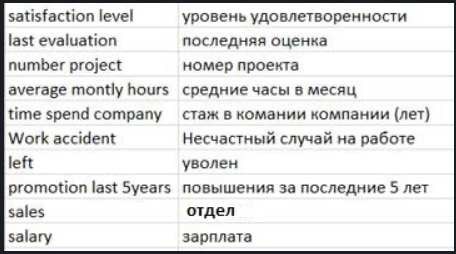

In [2]:
from PIL import Image
img = Image.open('descript.png')
arr = np.array(img.getdata())
img

1.Загрузить файл hr.csv:


In [31]:
df=pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.groupby('salary').count()[['satisfaction_level']].head()

,satisfaction_level
salary,
high,1237
low,7316
medium,6446


In [ ]:
#df1 = df.loc[df.salary.isin(['low']), 'salary'] = 1
#df1 = df1.loc[df.salary.isin(['medium']), 'salary'] = 2
#df1 = df1.loc[df.salary.isin(['high']), 'salary'] = 3
#df1.head()

2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


3.Рассчитать и визуализировать корреляционную матрицу для переменных.

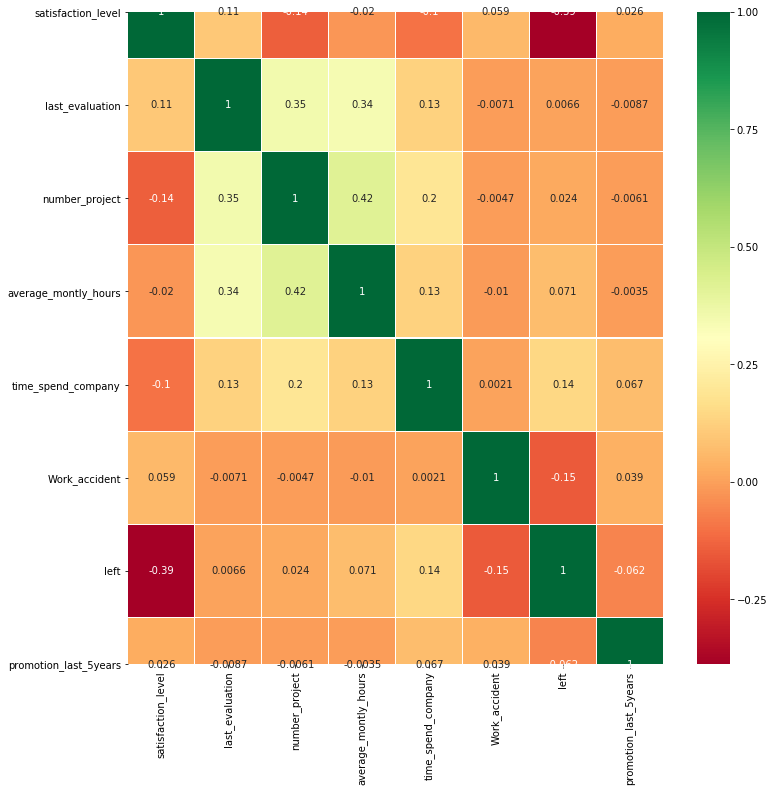

In [7]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

In [ ]:
Корреляционая матрица не показала сильных линейных взаимосвязей между переменными. 
Наиболее значимые линейные связи наблюдаются между переменными среднее число часов в месяц и количество проектов,
где есть прямая зависимость на уровне 0,42, так же эти показатели способствуют повышению в компании, 
здесь так же прямая зависимость 0,35 и 0,34.
Вторая по значимости линейная обратная взаимосвязь между уровнем удовлетворенности работника 
и тем уволился он из компании или продолжает в ней работать.

4.Визуализировать несколько взаимосвязей между переменными.

In [8]:
df.groupby('sales').count()[['satisfaction_level']].head(10)

,satisfaction_level
sales,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


In [9]:
df_m = df.loc[df.sales == 'marketing']

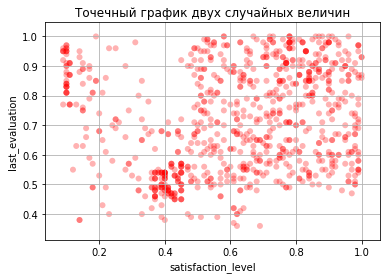

In [10]:
sl = df_m['satisfaction_level']
le = df_m['last_evaluation']
fig, ax = plt.subplots()
ax.scatter(sl, le, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('satisfaction_level')
plt.ylabel('last_evaluation')
plt.title('Точечный график двух случайных величин')
plt.show()

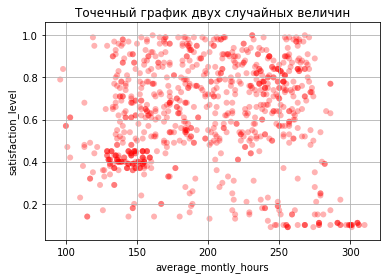

In [11]:
amh = df_m['average_montly_hours']
sl = df_m['satisfaction_level']
fig, ax = plt.subplots()
ax.scatter(amh, sl, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('average_montly_hours')
plt.ylabel('satisfaction_level')
plt.title('Точечный график двух случайных величин')
plt.show()

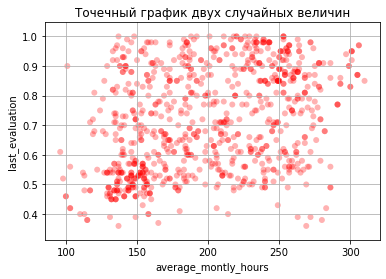

In [12]:
amh = df_m['average_montly_hours']
le = df_m['last_evaluation']
fig, ax = plt.subplots()
ax.scatter(amh, le, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('average_montly_hours')
plt.ylabel('last_evaluation')
plt.title('Точечный график двух случайных величин')
plt.show()

In [ ]:
В рамках изучения данных, я приняла решение посмотреть взаимосвязи показателей в разрезе одного отдела - маркетинга.
Точечные графики поределенно показывают зависимости между переменными: повышение, среднее отработанное время и 
уровень удовлетворенности. Но линеность этой зависимости слабая, на графиках выделяются квадраты, внутри которых 
распределение выглядит как равномерное.


5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [119]:
corr, p_value = pearsonr(df_m['average_montly_hours'], df_m['last_evaluation'])
print('Pearson correlation coefficient: %.3f' % corr, 'p_value: %.5f' % p_value)

coef, p_value = sts.spearmanr(df_m['average_montly_hours'], df_m['last_evaluation'])
print('Spearmans correlation coefficient: %.3f' % coef, 'p_value: %.5f' % p_value)

coef, p_value = sts.kendalltau(df_m['average_montly_hours'], df_m['last_evaluation'])
print('Kendall correlation coefficient: %.3f' % coef, 'p_value: %.5f' % p_value)

coef, p_value = sts.mannwhitneyu(df_m['average_montly_hours'], df_m['last_evaluation'])
print('two-sample wilcoxon-test: %.3f' % coef, 'p_value: %.5f' % p_value)

Pearson correlation coefficient: 0.361 p_value: 0.00000
Spearmans correlation coefficient: 0.364 p_value: 0.00000
Kendall correlation coefficient: 0.251 p_value: 0.00000
two-sample wilcoxon-test: 0.000 p_value: 0.00000


In [121]:
corr, p_value = pearsonr(df['average_montly_hours'], df['last_evaluation'])
print('Pearson correlation coefficient: %.3f' % corr)

coef, p = sts.spearmanr(df['average_montly_hours'], df['last_evaluation'])
print('Spearmans correlation coefficient: %.3f' % coef)

coef, p = sts.kendalltau(df['average_montly_hours'], df['last_evaluation'])
print('Kendall correlation coefficient: %.3f' % coef)

Pearson correlation coefficient: 0.340
Spearmans correlation coefficient: 0.342
Kendall correlation coefficient: 0.235
two-sample wilcoxon-test: 0.000 p_value: 0.00000


In [122]:
corr, p_value = pearsonr(df_m['average_montly_hours'], df_m['satisfaction_level'])
print('Pearson correlation coefficient: %.3f' % corr)

coef, p = sts.spearmanr(df_m['average_montly_hours'], df_m['satisfaction_level'])
print('Spearmans correlation coefficient: %.3f' % coef)

coef, p = sts.kendalltau(df_m['average_montly_hours'], df_m['satisfaction_level'])
print('Kendall correlation coefficient: %.3f' % coef)


Pearson correlation coefficient: -0.007
Spearmans correlation coefficient: 0.090
Kendall correlation coefficient: 0.071
two-sample wilcoxon-test: 0.000 p_value: 0.00000


In [53]:
corr, p_value = pearsonr(df_m['last_evaluation'], df_m['satisfaction_level'])
print('Pearson correlation coefficient: %.3f' % corr)

coef, p = sts.spearmanr(df_m['last_evaluation'], df_m['satisfaction_level'])
print('Spearmans correlation coefficient: %.3f' % coef)

coef, p = sts.kendalltau(df_m['last_evaluation'], df_m['satisfaction_level'])
print('Kendall correlation coefficient: %.3f' % coef)

Pearson correlation coefficient: 0.172
Spearmans correlation coefficient: 0.238
Kendall correlation coefficient: 0.163


In [54]:
corr, p_value = pearsonr(df['last_evaluation'], df['satisfaction_level'])
print('Pearson correlation coefficient: %.3f' % corr)

coef, p = sts.spearmanr(df['last_evaluation'], df['satisfaction_level'])
print('Spearmans correlation coefficient: %.3f' % coef)

coef, p = sts.kendalltau(df['last_evaluation'], df['satisfaction_level'])
print('Kendall correlation coefficient: %.3f' % coef)

Pearson correlation coefficient: 0.105
Spearmans correlation coefficient: 0.162
Kendall correlation coefficient: 0.114


In [56]:
corr, p_value = pearsonr(df['left'], df['satisfaction_level'])
print('Pearson correlation coefficient: %.3f' % corr)

coef, p = sts.spearmanr(df['left'], df['satisfaction_level'])
print('Spearmans correlation coefficient: %.3f' % coef)

coef, p = sts.kendalltau(df['left'], df['satisfaction_level'])
print('Kendall correlation coefficient: %.3f' % coef)

Pearson correlation coefficient: -0.388
Spearmans correlation coefficient: -0.366
Kendall correlation coefficient: -0.301


In [57]:
corr, p_value = pearsonr(df_m['left'], df_m['satisfaction_level'])
print('Pearson correlation coefficient: %.3f' % corr)

coef, p = sts.spearmanr(df_m['left'], df_m['satisfaction_level'])
print('Spearmans correlation coefficient: %.3f' % coef)

coef, p = sts.kendalltau(df_m['left'], df_m['satisfaction_level'])
print('Kendall correlation coefficient: %.3f' % coef)

Pearson correlation coefficient: -0.377
Spearmans correlation coefficient: -0.367
Kendall correlation coefficient: -0.302


In [ ]:
Были исследованы статистики Пирсона, Спирмана и Кендала, а так же Мани-Уилсона в первом случае.
критерий Мани-Уилсона не обнаружил зависимости. Три остальные критерии показали взаимосвязи между показателями.
В отделе меркетинга взаимосвязи между показателями чуть сильнее, чем в целом по компании.
Интересно то, что в отделе маркетинга зависимость между повышением и уровнем удовлетворения почти в 2 раза сильнее,
чем в целом по компании. 

6.Рассчитать сколько работников работает в каждом департаменте. 
(попробовать нарисовать распределение к этому и далее)

In [13]:
df_dep_count = df[ df.left < 1 ].groupby('sales').agg(['count'])['time_spend_company'].sort_values('count', ascending=False).reset_index()
df_dep_count.head(10)

,sales,count
0,sales,3126
1,technical,2023
2,support,1674
3,IT,954
4,product_mng,704
5,RandD,666
6,marketing,655
7,accounting,563
8,management,539
9,hr,524


In [14]:
df_dep = df[ df.left < 1 ]

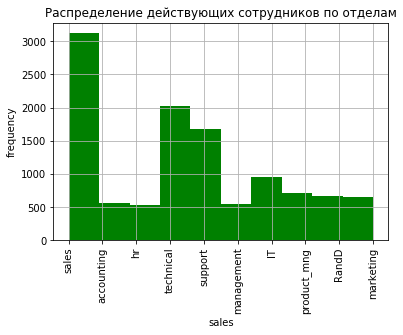

In [15]:
n, bins, patches = plt.hist(df_dep['sales'], 10, facecolor='g')

plt.xlabel('sales')
plt.ylabel('frequency')
plt.title('Распределение действующих сотрудников по отделам')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [ ]:
В зависимости от порядка в котором отделы представлены на графике, можно получить как нормальное распределение, 
так и геометрическое. Больше всего сотрудников в отделе продаж, а так же техническом отделе и отделе поддержки. 
Основной вид деятельности компании связан с интенсивными продажами.

7.Показать распределение сотрудников по зарплатам.

In [16]:
df.groupby('salary').agg(['count'])['time_spend_company'].sort_values('count', ascending=False).head()

,count
salary,
low,7316
medium,6446
high,1237


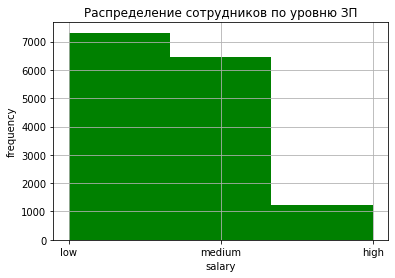

In [17]:
n, bins, patches = plt.hist(df['salary'], 3, facecolor='g')

plt.xlabel('salary')
plt.ylabel('frequency')
plt.title('Распределение сотрудников по уровню ЗП')
plt.grid(True)
plt.show()

In [ ]:
Распределение зарплат ближе всего к геометрическому. Высокую ЗП получает меньше всего сотрудников.

8.Показать распределение сотрудников по зарплатам совместно с департаментами.

In [18]:
df.groupby(['sales', 'salary']).agg(['count'])['time_spend_company'].sort_values('count', ascending=False).head(10)

count
sales       salary       
sales       low      2099
            medium   1772
technical   low      1372
            medium   1147
support     low      1146
            medium    942
IT          low       609
            medium    535
product_mng low       451
marketing   low       402

In [19]:
df['sales_salary'] = df['sales'] + ' ' + df['salary']
df = df.sort_values(by=['salary', 'sales'])
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,sales_salary
1281,0.75,0.88,5,270,5,0,1,0,IT,high,IT high
1359,0.46,0.46,2,145,3,0,1,0,IT,high,IT high
1437,0.40,0.53,2,155,3,0,1,0,IT,high,IT high
1515,0.72,0.99,5,257,5,0,1,0,IT,high,IT high
3192,0.49,0.76,5,237,3,0,0,0,IT,high,IT high


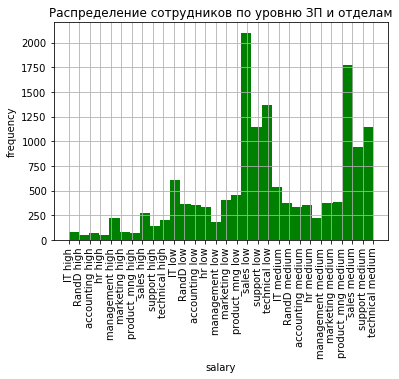

In [20]:
n, bins, patches = plt.hist(df['sales_salary'], 30, facecolor='g')

plt.xlabel('salary')
plt.ylabel('frequency')
plt.title('Распределение сотрудников по уровню ЗП и отделам')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [21]:
df_left = df[ df.left > 0 ]
df_noleft = df[ df.left < 1 ]

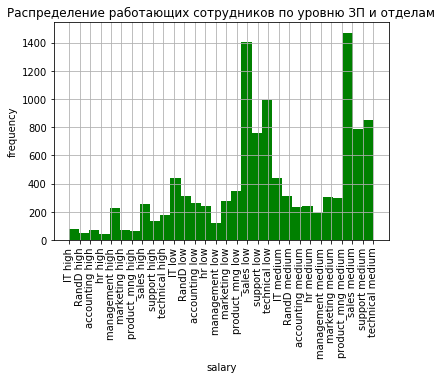

In [22]:
n, bins, patches = plt.hist(df_noleft['sales_salary'], 30, facecolor='g')

plt.xlabel('salary')
plt.ylabel('frequency')
plt.title('Распределение работающих сотрудников по уровню ЗП и отделам')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

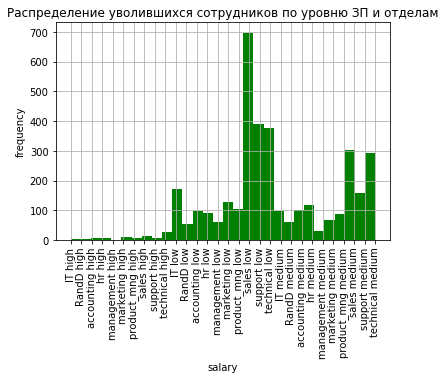

In [23]:
n, bins, patches = plt.hist(df_left['sales_salary'], 30, facecolor='g')

plt.xlabel('salary')
plt.ylabel('frequency')
plt.title('Распределение уволившихся сотрудников по уровню ЗП и отделам')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [ ]:
При сравнении 3х гистограм, в целом по компании,
и отдельно по уволившимся и работающим можно обратить внимание на следующее:
1. При средней ЗП, гистограммы в целом по компании и по работающим очень похожи. 
Текучка по отделам при такой ЗП равномерная, за исключением технического отдела, 
где люди при средней ЗП более склонны к увольнениям, чем в остальных отделах.
2. При низкой ЗП отдел поддержки более чем остальные отделы склонен к увольнениям, аналогично и с отделом маркетинга.
3. Сотрудники с высокой ЗП упольняются реже всего.

9.Сколько сотрудников покинули компанию.

In [24]:
df.groupby('left').agg(['count'])['time_spend_company'].sort_values('count', ascending=False).head(10)

,count
left,
0,11428
1,3571


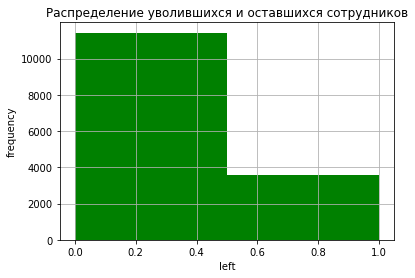

In [25]:
n, bins, patches = plt.hist(df['left'], 2, facecolor='g')

plt.xlabel('left')
plt.ylabel('frequency')
plt.title('Распределение уволившихся и оставшихся сотрудников')
plt.grid(True)
plt.show()

In [26]:
df_extra = df
df_extra.left = df_extra.left.astype(str)

In [27]:
df_extra['sales_left'] = df_extra['sales'] + df_extra['left']
df_extra = df_extra.sort_values(by=['sales_left'])

In [28]:
df_extra.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,sales_salary,sales_left
11967,0.82,0.82,3,148,3,0,0,0,IT,low,IT low,IT0
13280,0.14,0.56,5,259,4,1,0,0,IT,low,IT low,IT0
13279,0.12,0.49,4,191,5,0,0,0,IT,low,IT low,IT0
13211,0.49,0.60,2,113,5,0,0,0,IT,low,IT low,IT0
13206,0.67,0.49,3,224,3,0,0,0,IT,low,IT low,IT0


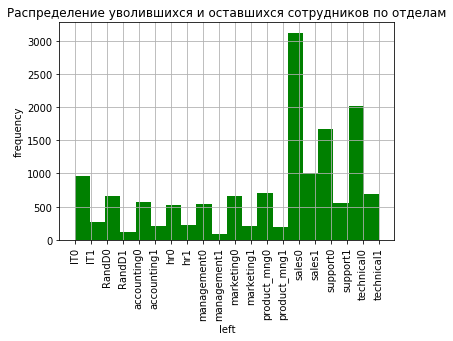

In [29]:
n, bins, patches = plt.hist(df_extra['sales_left'], 20, facecolor='g')

plt.xlabel('left')
plt.ylabel('frequency')
plt.title('Распределение уволившихся и оставшихся сотрудников по отделам')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [ ]:
В отделах RandD1 и management люди уволняются реже, чем в остальных отделах.
В бухгалтерии, отделе кадров, продажах, поддержке и у техников высокая текучка персонала.

9.Сколько сотрудников покинули компанию.(по департаментам)

In [32]:
df[ df.left > 0 ].groupby('sales').agg(['count'])['time_spend_company'].sort_values('count', ascending=False).head(10)

,count
sales,
sales,1014
technical,697
support,555
IT,273
hr,215
accounting,204
marketing,203
product_mng,198
RandD,121


In [34]:
df_left = df[ df.left > 0 ]

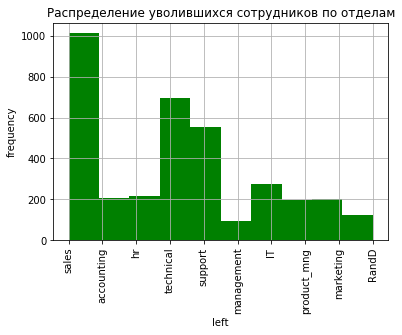

In [38]:
n, bins, patches = plt.hist(df_left['sales'], 10, facecolor='g')

plt.xlabel('left')
plt.ylabel('frequency')
plt.title('Распределение уволившихся сотрудников по отделам')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [ ]:
Если поменять отделы местами на гистограмме, то можно получить как распределение близкое к нормальному, так и геометрическое.
ольше всего уволившихся в трех самых крупных отделах компании: продажи, технический отдел и отдел поддержки.

10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

1. Средний уровень удовлетворения оставшихся сотрудников выше, чем средний уровень удовлетворения уволившихся

In [66]:
mean_left = df_left['satisfaction_level'].mean()
mean_left

0.44009801176140917

In [67]:
mean_noleft = df_noleft['satisfaction_level'].mean()
mean_noleft

0.6668095904795139

In [68]:
difference = mean_noleft - mean_left
difference

0.22671157871810477

In [123]:
means = []
for i in range(100000):
    left = df_left.sample(frac=1, replace=True).satisfaction_level.mean()
    noleft = df_noleft.sample(frac=1, replace=True).satisfaction_level.mean()
    means.append(noleft - left)

In [70]:
means

[0.22844781720322876,
 0.22331116041239835,
 0.22479034456482622,
 0.22910964898566233,
 0.2268671544400443,
 0.22200782991403095,
 0.22646574900852867,
 0.22160354279264755,
 0.22846321464070513,
 0.24002790338340252,
 0.2290693665878989,
 0.23081484510377076,
 0.2323587462277012,
 0.2238224662913303,
 0.23047959871389628,
 0.23096420632428677,
 0.22927856477533148,
 0.23216684945139882,
 0.22140632420167078,
 0.23118289840562456,
 0.22526806944519462,
 0.2281702984617101,
 0.22596470106338634,
 0.22346227882662073,
 0.223555836955939,
 0.23488431485421135,
 0.22364289976609836,
 0.22554037002465566,
 0.2250503724780119,
 0.230380151008387,
 0.22876333430924822,
 0.22945432041274028,
 0.22176552635388191,
 0.22281590427182496,
 0.2219353505129666,
 0.23112516659156473,
 0.2228637871266213,
 0.22806237991120448,
 0.2222375052524609,
 0.22609331485195777,
 0.2260207746805622,
 0.2237645945584824,
 0.22687960402640117,
 0.2313074908155912,
 0.22589015228553927,
 0.22903052993590034,
 0.2

In [71]:
confidence_interval = pd.Series(means).quantile([0.025, 0.975])
confidence_interval

0.025    0.217135
0.975    0.236246
dtype: float64

In [ ]:
Различие в уровне удовлетворенности между уволившимися и не уволившимися сотрудниками попадает в доверительный 
интервал. Соответственно гипотеза о том, что средний уровень удовлетворенности уволившихся работников ниже на 0,22
пункта верна.

2. В департаментах с большим колличеством сотрудников, текучка персонала выше

In [86]:
count_left = df_left.groupby('sales').agg(['count'])['time_spend_company'].sort_values('count', ascending=False)
count_left.columns = ['count_left_']
count_left

,count_left_
sales,
sales,1014
technical,697
support,555
IT,273
hr,215
accounting,204
marketing,203
product_mng,198
RandD,121


In [87]:
count_noleft = df_noleft.groupby('sales').agg(['count'])['time_spend_company'].sort_values('count', ascending=False)
count_noleft.columns = ['count_no_left']
count_noleft

,count_no_left
sales,
sales,3126
technical,2023
support,1674
IT,954
product_mng,704
RandD,666
marketing,655
accounting,563
management,539


In [96]:
df_dep = count_noleft.join(count_left).reset_index()
df_dep

,sales,count_no_left,count_left_
0,sales,3126,1014
1,technical,2023,697
2,support,1674,555
3,IT,954,273
4,product_mng,704,198
5,RandD,666,121
6,marketing,655,203
7,accounting,563,204
8,management,539,91
9,hr,524,215


In [97]:
sum_dep = df_dep.sum()
sum_dep

sales            salestechnicalsupportITproduct_mngRandDmarketi...
count_no_left                                                11428
count_left_                                                   3571
dtype: object

In [98]:
df_dep['part_no_left'] = df_dep['count_no_left'] / sum_dep['count_no_left']
df_dep

,sales,count_no_left,count_left_,part_no_left
0,sales,3126,1014,0.273539
1,technical,2023,697,0.177021
2,support,1674,555,0.146482
3,IT,954,273,0.083479
4,product_mng,704,198,0.061603
5,RandD,666,121,0.058278
6,marketing,655,203,0.057315
7,accounting,563,204,0.049265
8,management,539,91,0.047165
9,hr,524,215,0.045852


In [100]:
df_dep['part_left'] = df_dep['count_left_'] / sum_dep['count_left_']
df_dep

,sales,count_no_left,count_left_,part_no_left,part_left
0,sales,3126,1014,0.273539,0.283954
1,technical,2023,697,0.177021,0.195183
2,support,1674,555,0.146482,0.155419
3,IT,954,273,0.083479,0.076449
4,product_mng,704,198,0.061603,0.055447
5,RandD,666,121,0.058278,0.033884
6,marketing,655,203,0.057315,0.056847
7,accounting,563,204,0.049265,0.057127
8,management,539,91,0.047165,0.025483
9,hr,524,215,0.045852,0.060207


In [103]:
df_dep['difference'] = df_dep['part_left'] - df_dep['part_no_left']
df_dep

,sales,count_no_left,count_left_,part_no_left,part_left,difference
0,sales,3126,1014,0.273539,0.283954,0.010415
1,technical,2023,697,0.177021,0.195183,0.018162
2,support,1674,555,0.146482,0.155419,0.008936
3,IT,954,273,0.083479,0.076449,-0.007030
4,product_mng,704,198,0.061603,0.055447,-0.006156
5,RandD,666,121,0.058278,0.033884,-0.024394
6,marketing,655,203,0.057315,0.056847,-0.000469
7,accounting,563,204,0.049265,0.057127,0.007862
8,management,539,91,0.047165,0.025483,-0.021682
9,hr,524,215,0.045852,0.060207,0.014355


In [106]:
df_dep.iloc[[0, 1, 2], :].sum()

sales            salestechnicalsupport
count_no_left                     6823
count_left_                       2266
part_no_left                  0.597042
part_left                     0.634556
difference                   0.0375138
dtype: object

In [109]:
df_dep.iloc[[3, 4, 5, 6, 7, 8, 9], :].sum()

sales            ITproduct_mngRandDmarketingaccountingmanagementhr
count_no_left                                                 4605
count_left_                                                   1305
part_no_left                                              0.402958
part_left                                                 0.365444
difference                                              -0.0375138
dtype: object

In [ ]:
Доля сотрудников работающих в 3х самых больших департаментах 59,7%, при этом доля уволившихся в общем 
числе уволившихся по этим департаментам 63,4%, что говорит о том, что в данных департаментах текучка среди
сотрудников выше.

In [110]:
df_dep.iloc[[0, 1, 2, 3, 4], :].sum()

sales            salestechnicalsupportITproduct_mng
count_no_left                                  8481
count_left_                                    2737
part_no_left                               0.742125
part_left                                  0.766452
difference                                0.0243274
dtype: object

In [111]:
df_dep.iloc[[5, 6, 7, 8, 9], :].sum()

sales            RandDmarketingaccountingmanagementhr
count_no_left                                    2947
count_left_                                       834
part_no_left                                 0.257875
part_left                                    0.233548
difference                                 -0.0243274
dtype: object

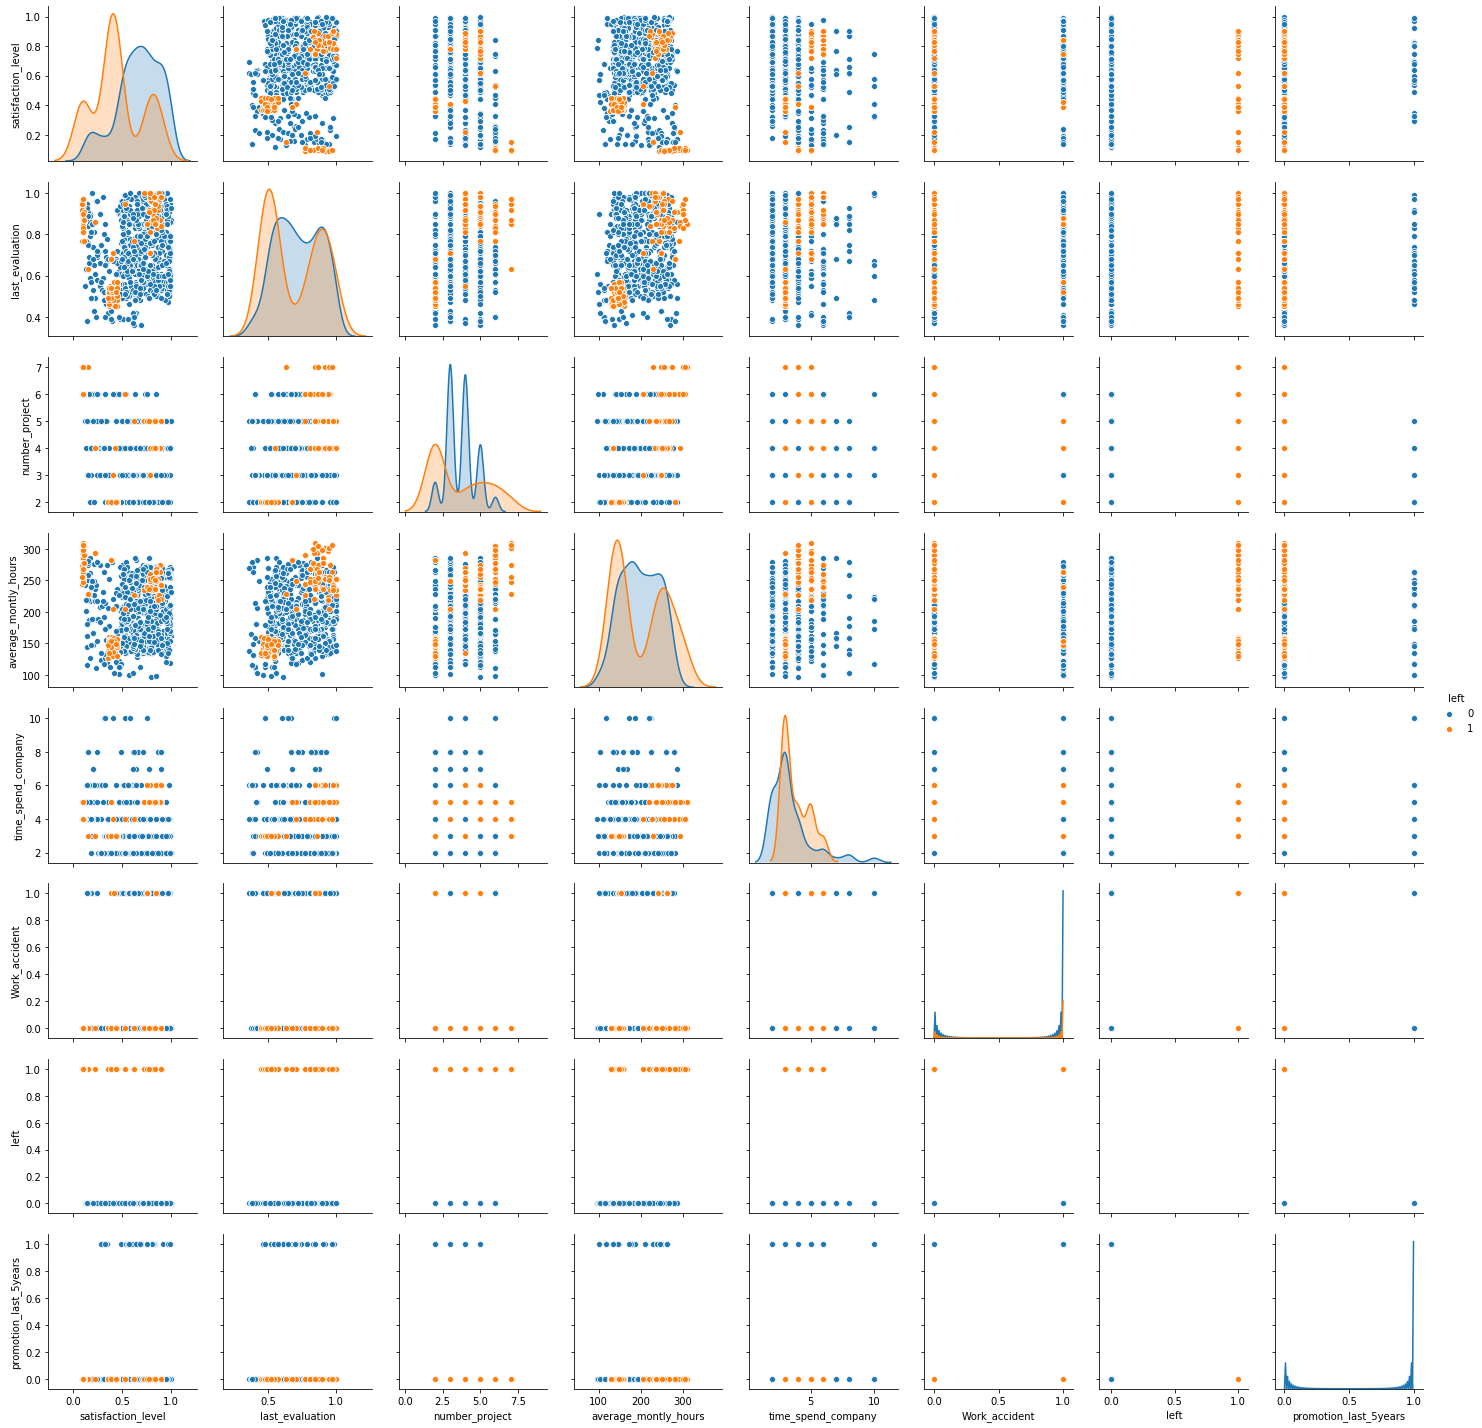

In [125]:
fig = sns.pairplot(data=df_m, hue='left')
plt.show()

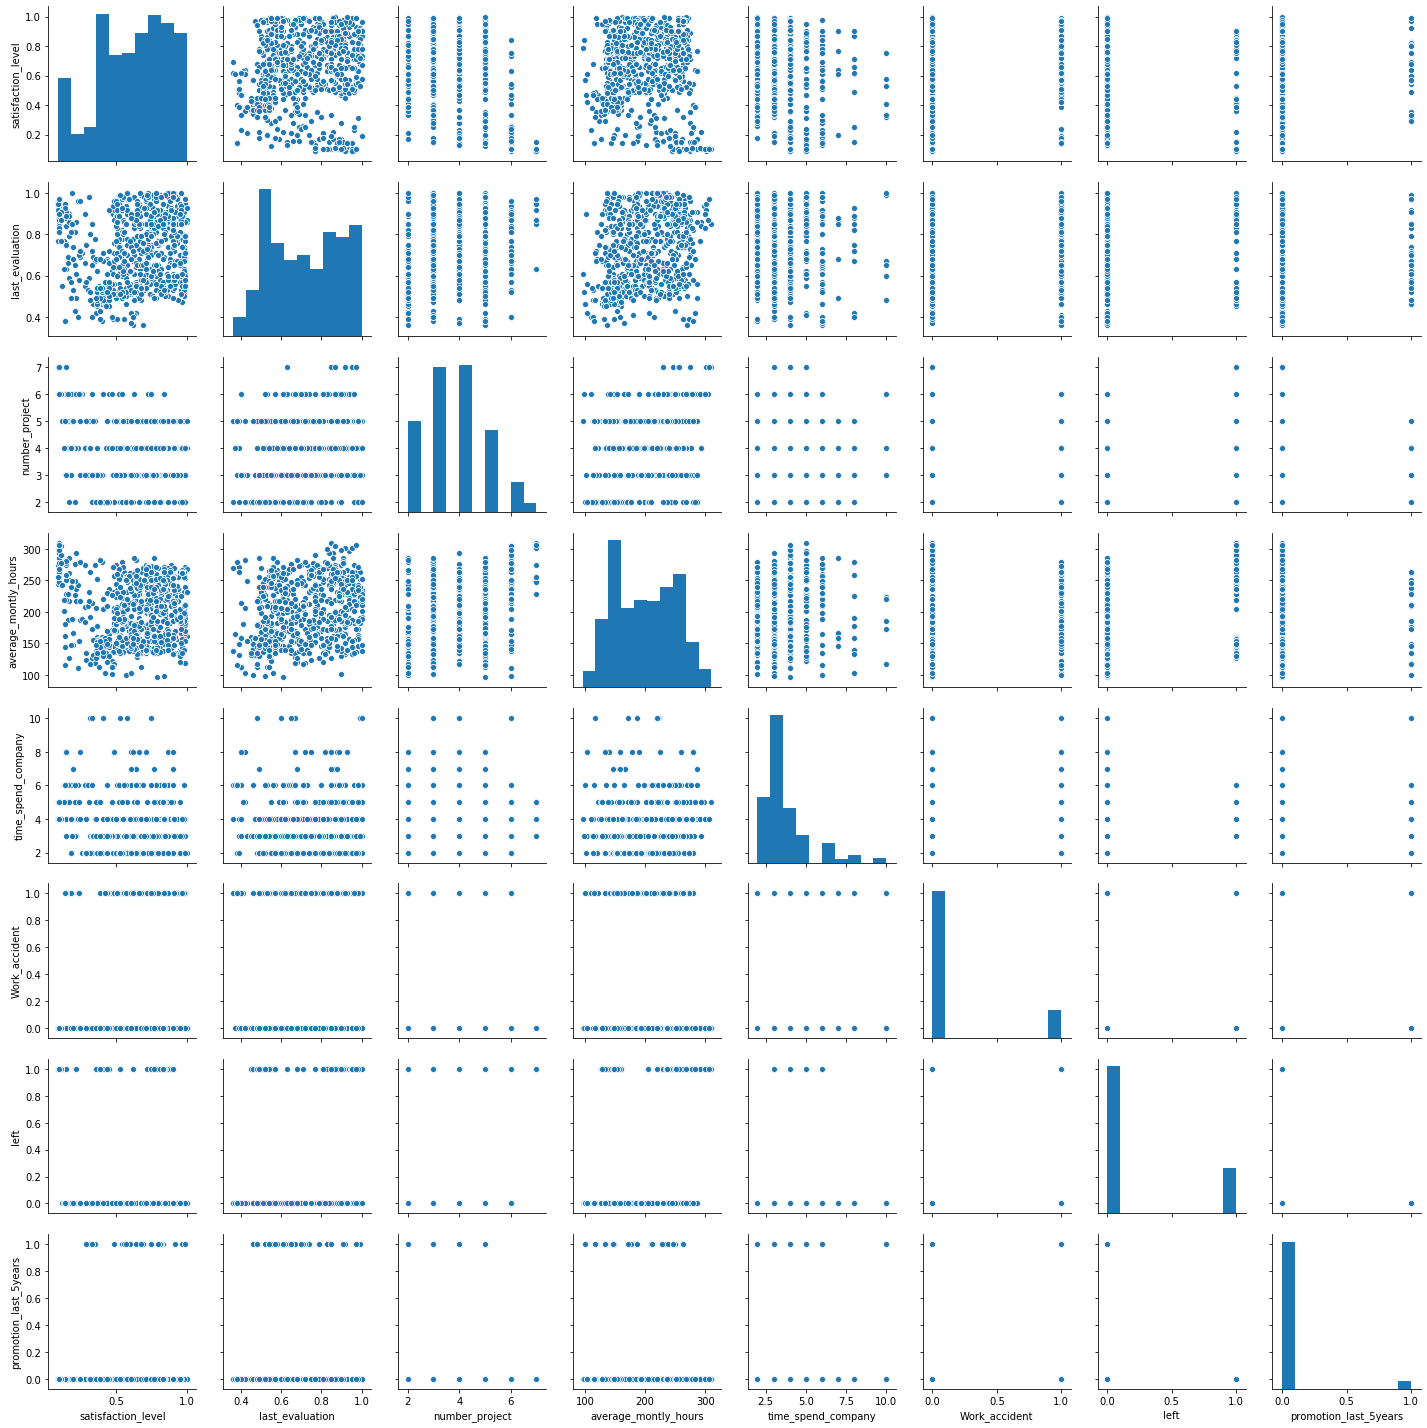

In [124]:
g = sns.pairplot(df_m)

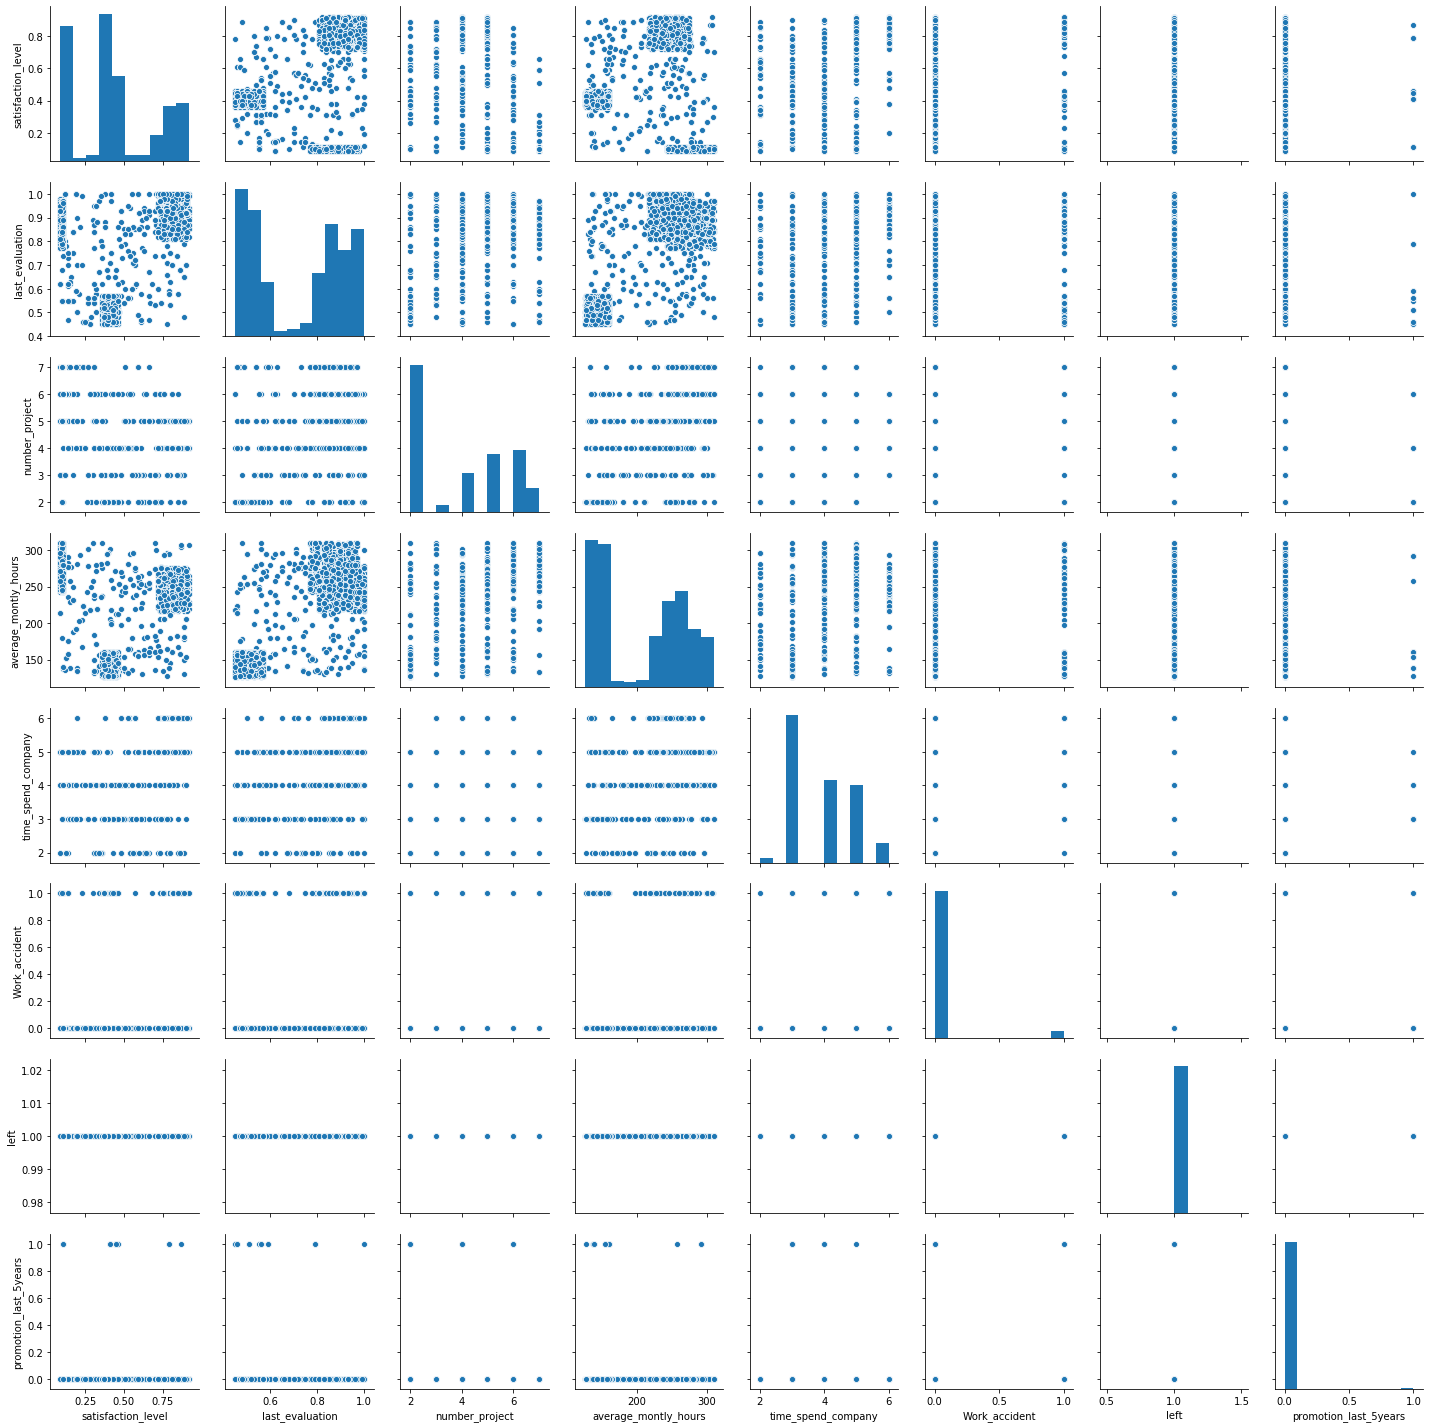

In [39]:
g = sns.pairplot(df_left)

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


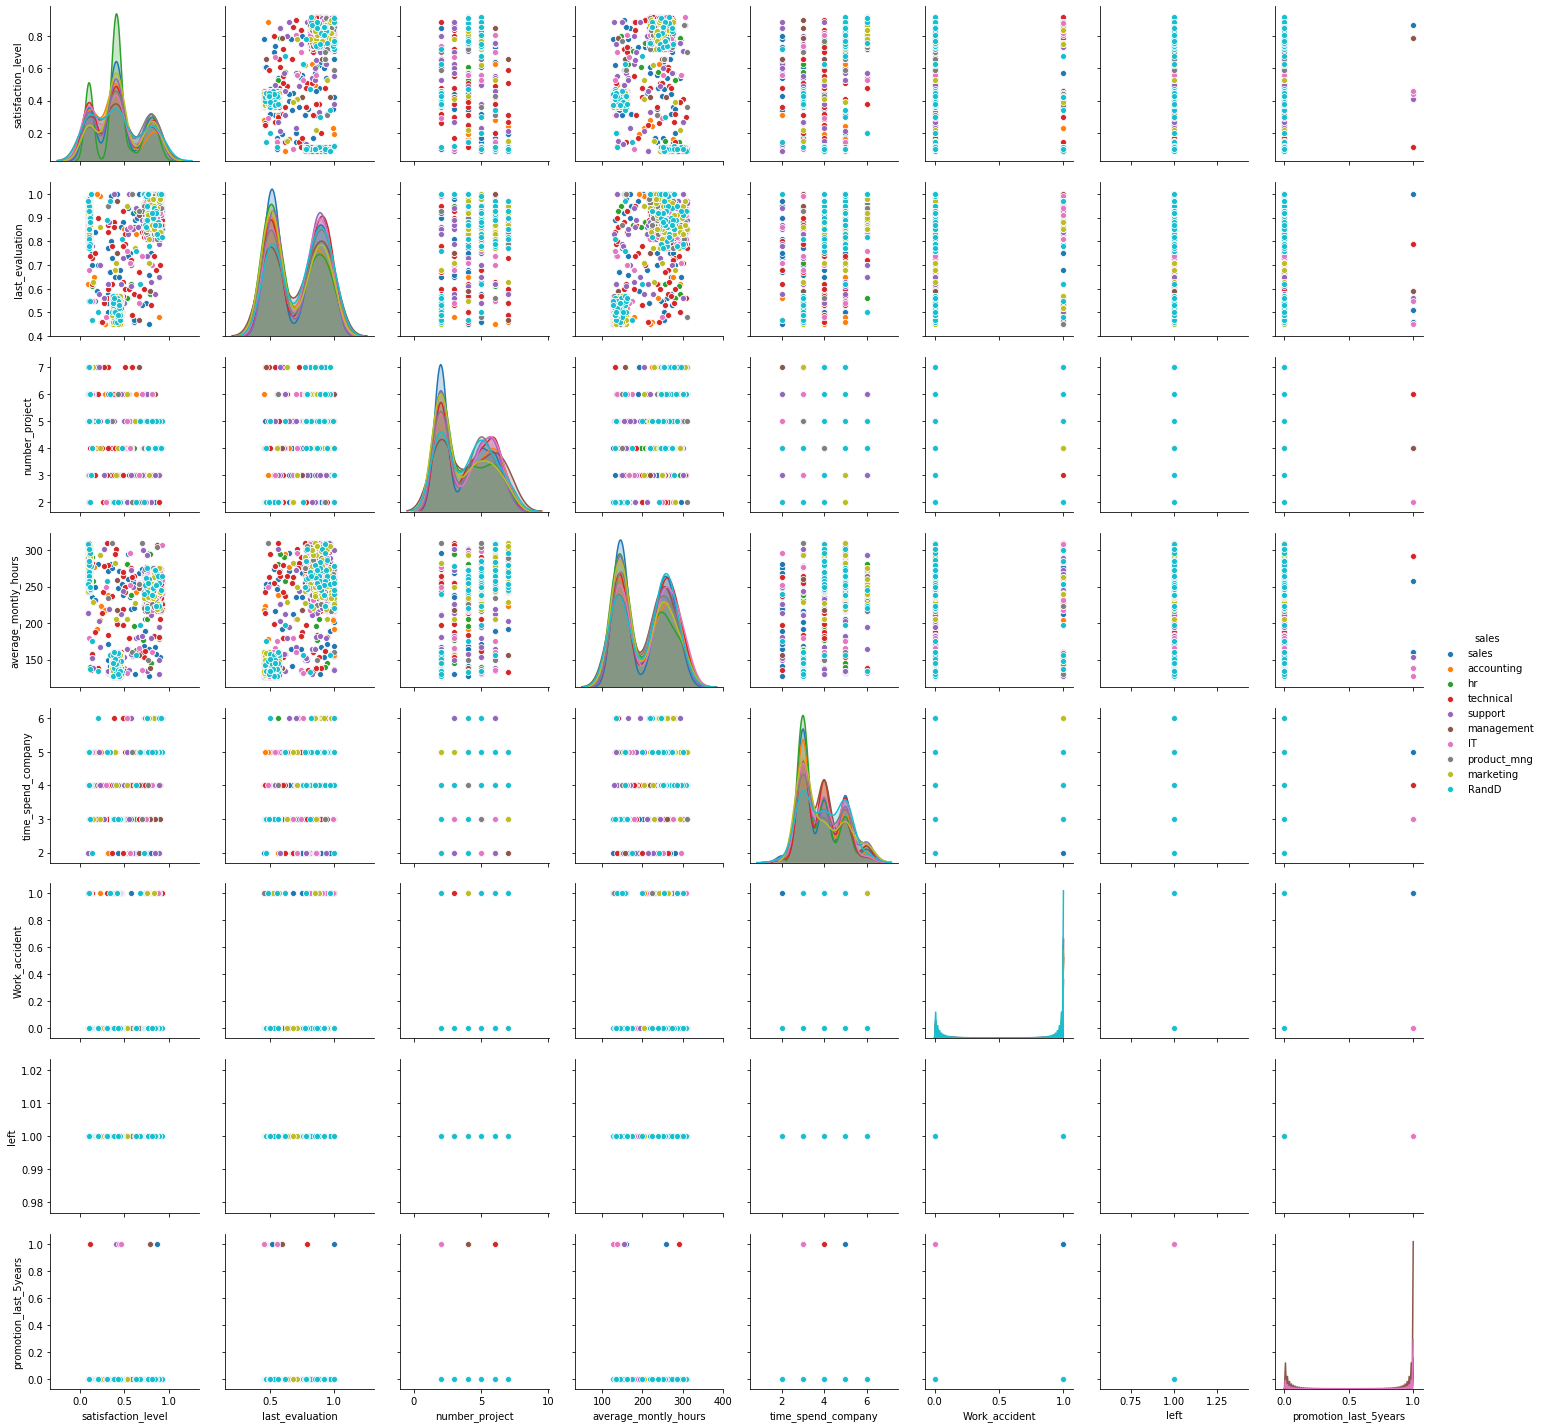

In [41]:
fig = sns.pairplot(data=df_left, hue='sales')
plt.show()

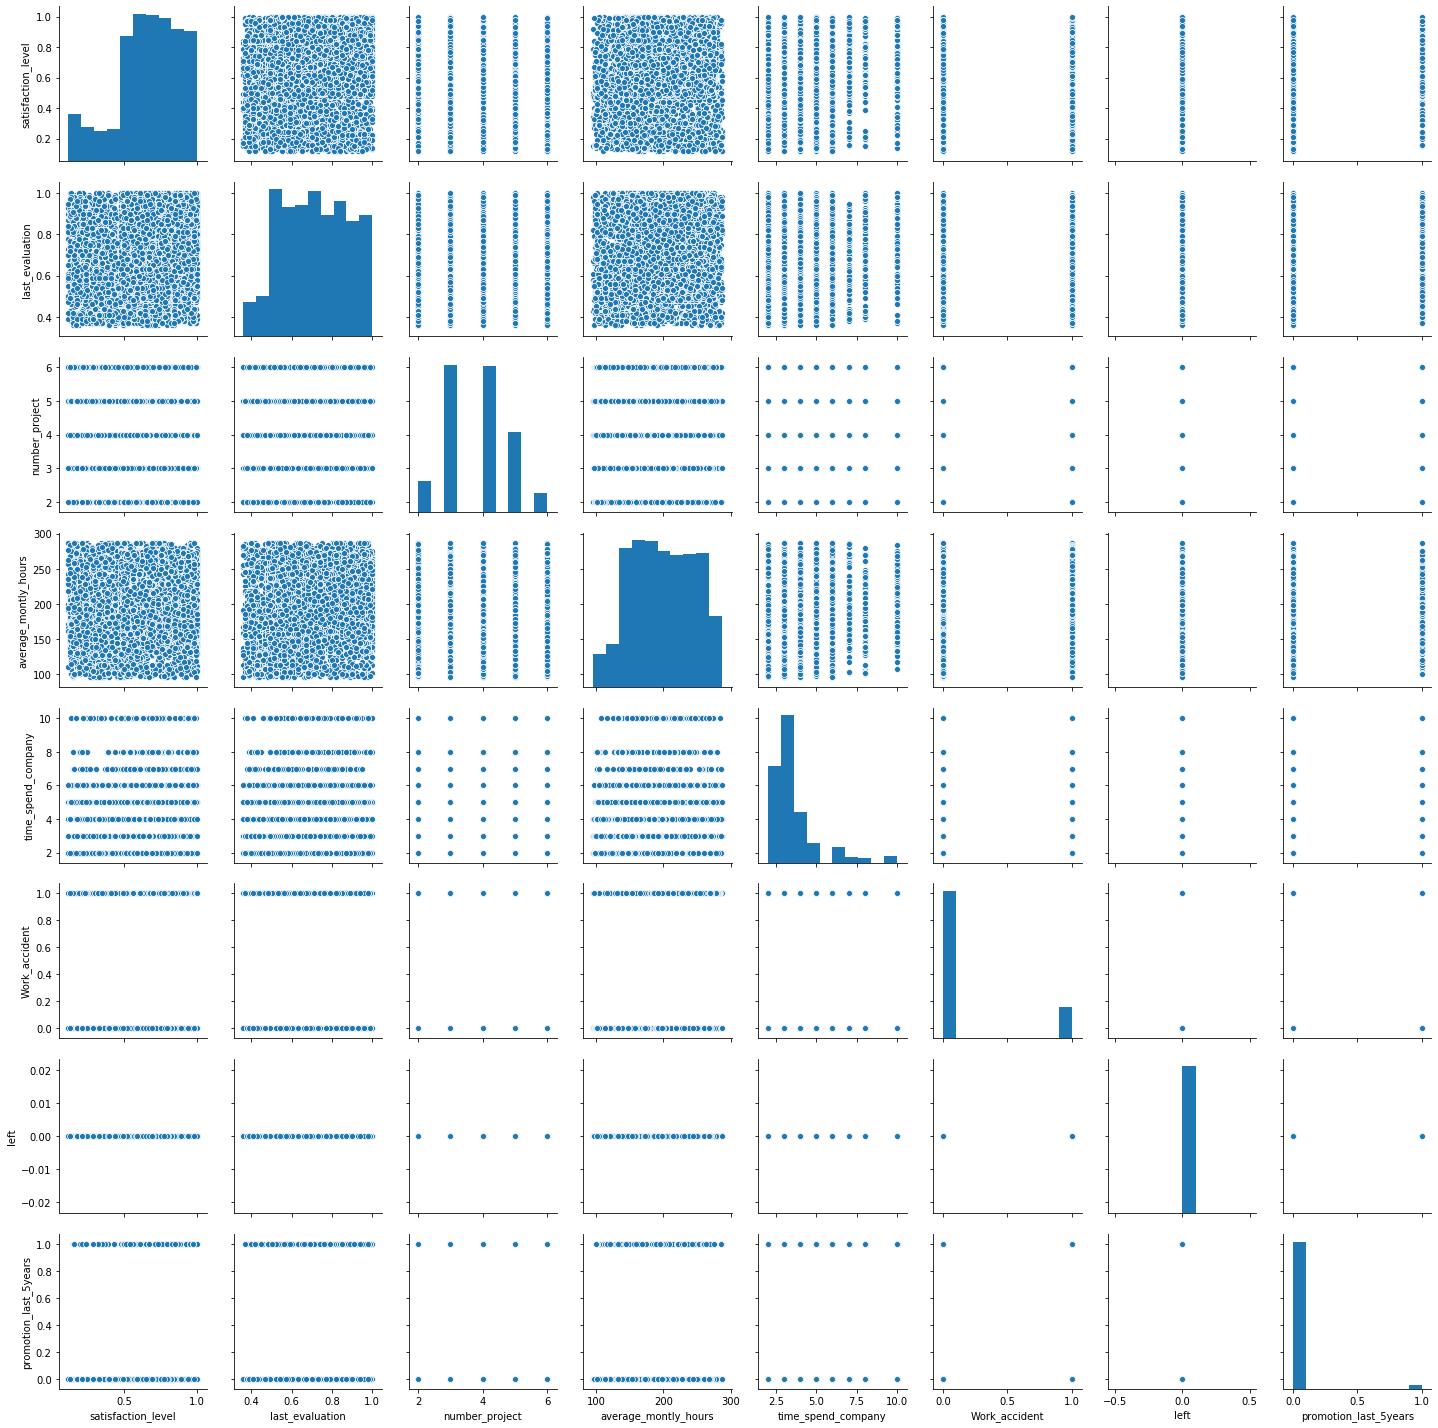

In [40]:
g = sns.pairplot(df_noleft)

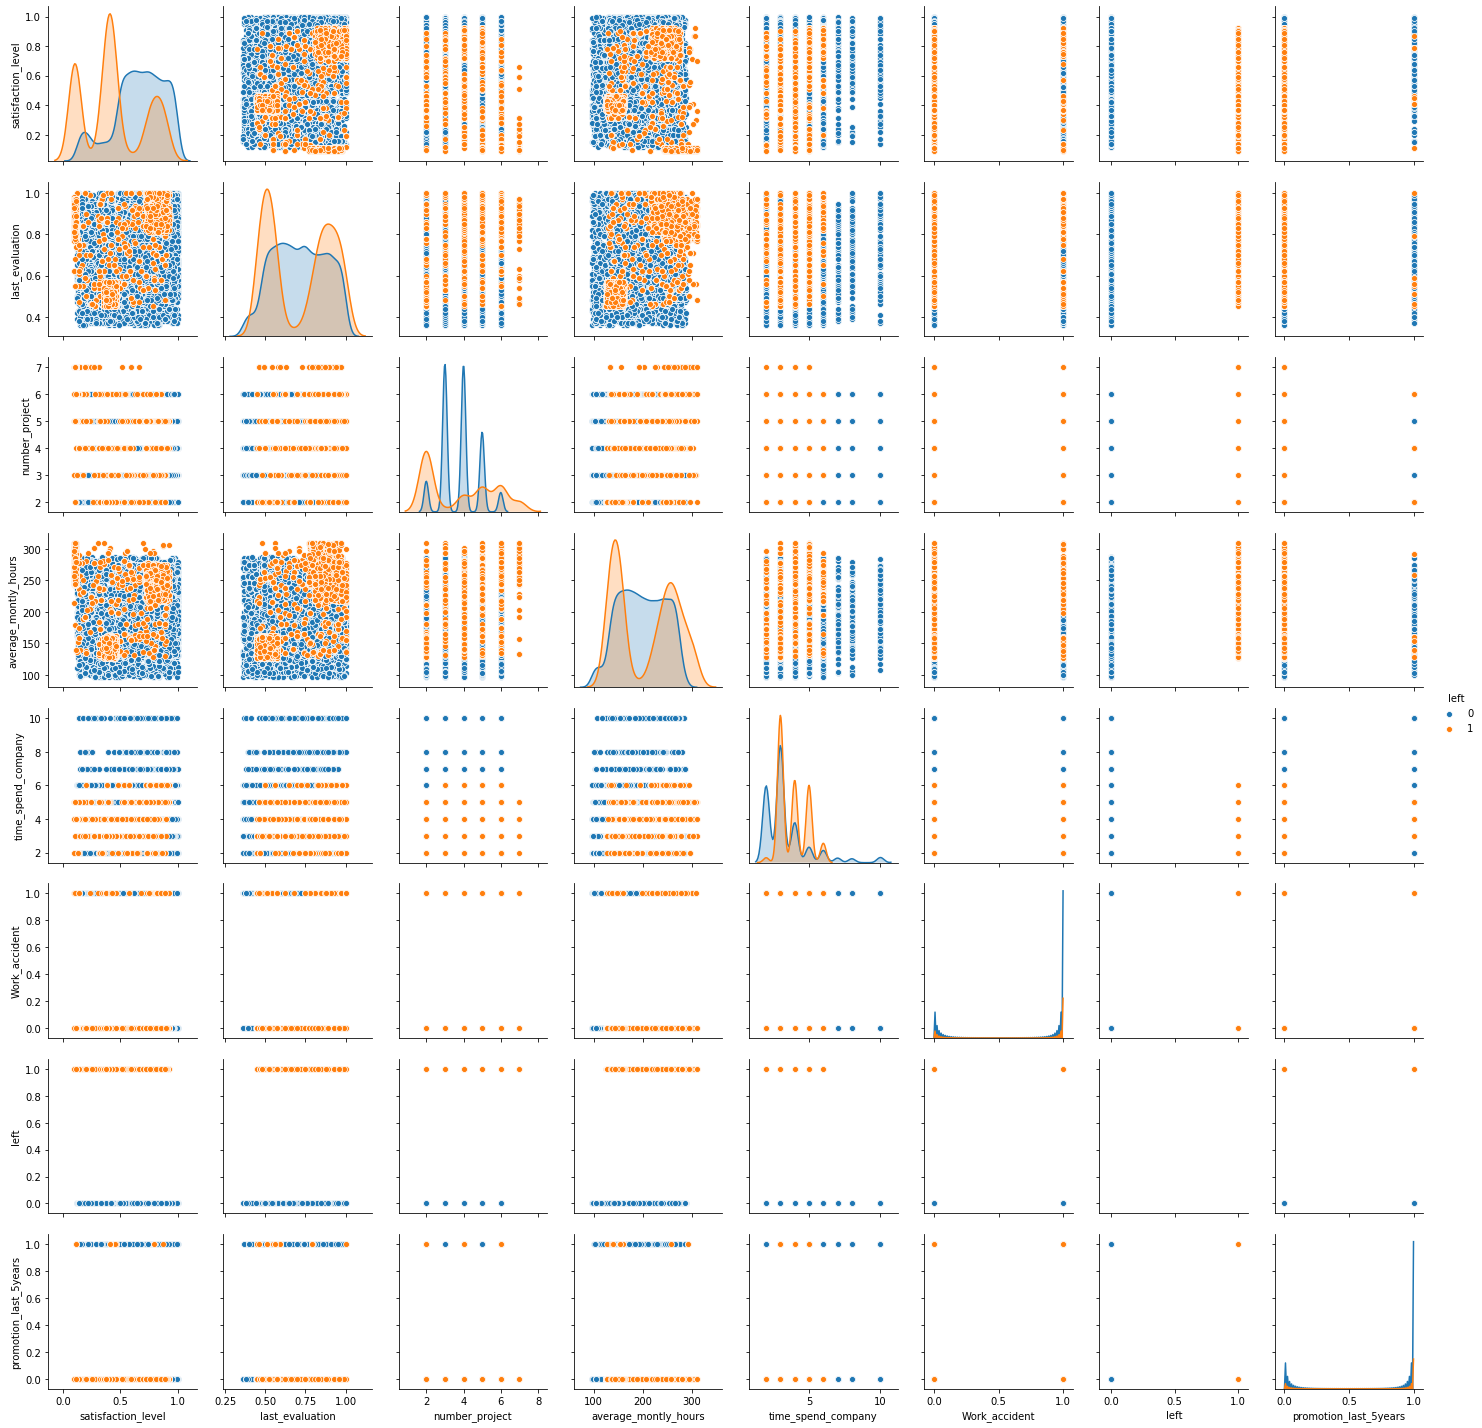

In [126]:
fig = sns.pairplot(data=df, hue='left')
plt.show()